# 11.7. Creating a sound synthesizer in the Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import (
    Audio, display, clear_output)
from ipywidgets import widgets
from functools import partial
%matplotlib inline

In [2]:
rate = 16000.
duration = .25
t = np.linspace(
    0., duration, int(rate * duration))

In [3]:
def synth(f):
    x = np.sin(f * 2. * np.pi * t)
    display(Audio(x, rate=rate, autoplay=True))

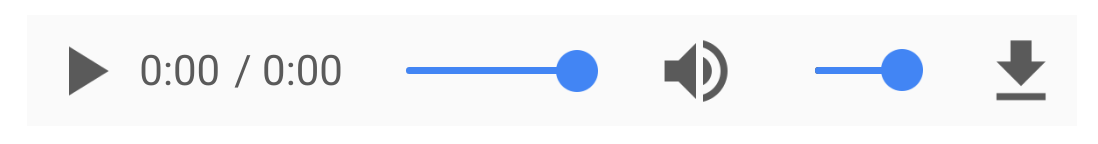

In [4]:
synth(440)

In [5]:
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
notes = list(zip(notes, freqs))

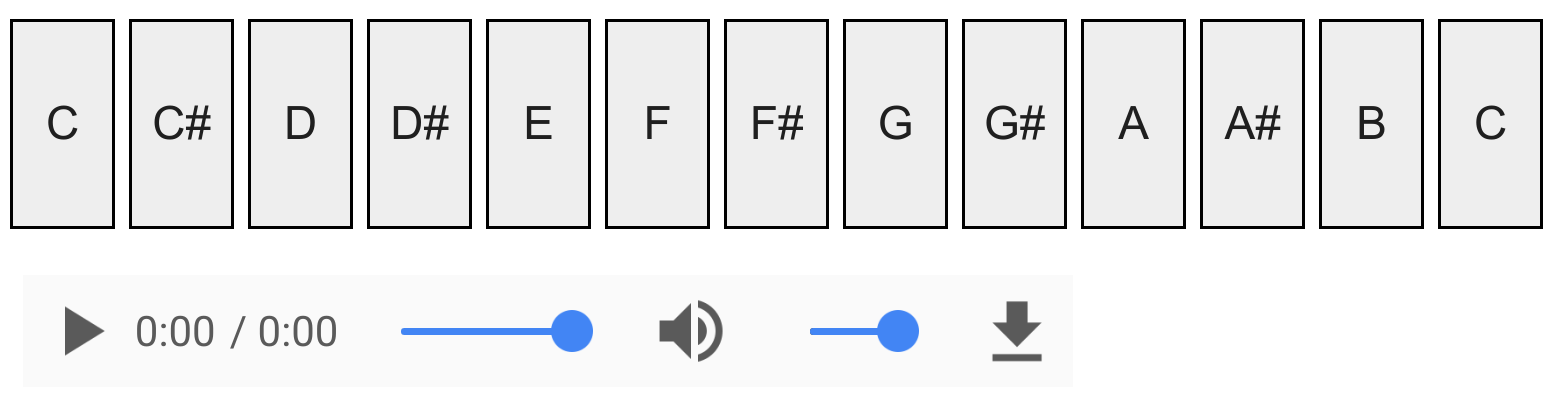

In [6]:
layout = widgets.Layout(
    width='30px', height='60px',
    border='1px solid black')

buttons = []
for note, f in notes:
    button = widgets.Button(
        description=note, layout=layout)

    def on_button_clicked(f, b):
        # When a button is clicked, we play the sound
        # in a dedicated Output widget.
        with widgets.Output():
            synth(f)

    button.on_click(partial(on_button_clicked, f))
    buttons.append(button)

# We place all buttons horizontally.
widgets.Box(children=buttons)